Descriptive Stats

Measures that summarize important features of data, often with a single number. It is common first step after cleaning and preparing data set for analysis.

Measures of Center (Centrality)

Common Measures of Center include Mean, Median and Mode.

Mean

Average of values, i.e., sum of the values divided by the total number of records.

Median

Value where 50% of data lies below and 50% lies above it. Hence also known as the 50% percentile.

Mode

Value that appears most frequently.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading car models dataset
mtcars = pd.read_csv("/content/drive/MyDrive/mtcars.csv")
mtcars =  mtcars.rename(columns={'Unnamed: 0': 'model'})
mtcars.index = mtcars.model
del mtcars["model"]

mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
mtcars.mean() # We get Mean of each Col

,0
mpg,20.090625
cyl,6.187500
disp,230.721875
hp,146.687500
drat,3.596563
wt,3.217250
qsec,17.848750
vs,0.437500
am,0.406250
gear,3.687500


In [ ]:
mtcars.mean(axis = 1) # Mean of each Row

,0
model,
Mazda RX4,29.907273
Mazda RX4 Wag,29.981364
Datsun 710,23.598182
Hornet 4 Drive,38.739545
Hornet Sportabout,53.664545
Valiant,35.049091
Duster 360,59.720000
Merc 240D,24.634545
Merc 230,27.233636


In [ ]:
mtcars.median() # Median of each Col

,0
mpg,19.200
cyl,6.000
disp,196.300
hp,123.000
drat,3.695
wt,3.325
qsec,17.710
vs,0.000
am,0.000
gear,4.000


In [ ]:
mtcars.mode() # Col with multiple Modes return multiple values
# Col with no Modes return NaN

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean and Median Differences

In Symmetric Distribution, Mean and Median will be the same. However, in Skewed Distributions, the Mean tends to get pulled in the direction of the Skew.

Mean is influenced heavily by Outliers, while Median resists influence of Outliers.

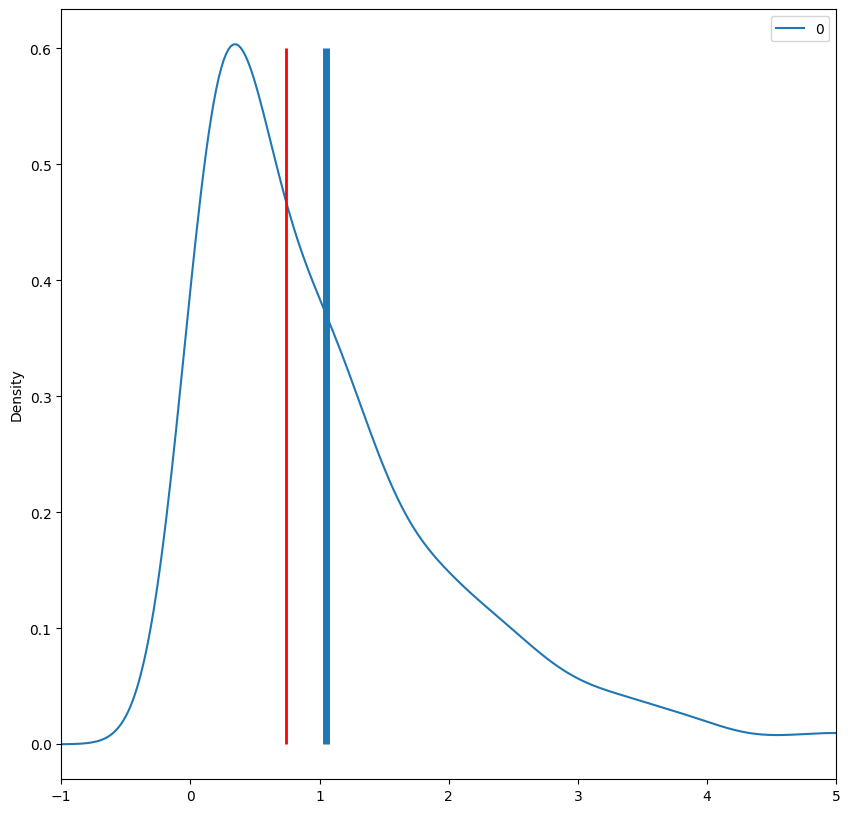

In [ ]:
# Mean and Median in a Skewed Distribution of Random Numbers
skewed_data = pd.DataFrame(np.random.exponential(size = 1000))

skewed_data.plot(kind = "density", figsize = (10, 10), xlim = (-1, 5))
plt.vlines(skewed_data.mean(), ymin = 0, ymax = 0.6, linewidth = 5.0)
plt.vlines(skewed_data.median(), ymin = 0, ymax = 0.6, linewidth = 2.0, color = "red")



---


Measures of Spread (Order Statistics)

Describe how data varies.

Range

Distance between the Maximum and Minimum observations.

In [ ]:
max(mtcars["mpg"]) - min(mtcars["mpg"]) # Range

23.5

Five Number Summary

As noted earlier, the Median represents the 50th percentile. A summary of several percentiles can be used to descrbe a variable's spread using `quantile()` function.

In [ ]:
five_num = [mtcars["mpg"].quantile(0),
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

In [ ]:
mtcars["mpg"].describe() # Give important statistical features

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


Interquatile Range (IQR)

Distance between the 3rd Quartile and 1st Quartile.

In [ ]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

Variance and Standard Deviation are two other common measures of the spread.

In [ ]:
mtcars["mpg"].var()

36.32410282258064

In [ ]:
mtcars["mpg"].std()

6.026948052089104